<a href="https://colab.research.google.com/github/SubhadipGhosh07/Retail-Sales-Prediction/blob/main/Rossmann_Sales_prediction_Complete_and_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction : Predicting sales of a major store chain Rossmann**

### **Problem Description:**

Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We will be working with 1115 Rossmann stores. We need to predict the 'Sales' column for the test dataset. As there are a total of 3000 stores, and we will be working with 1115 of them, some stores in the dataset were temporarily closed for refurbishment.

### **Datasets we will be working with:**
1. Rossmann Stores Data.csv: This csv file has historical data of all the stores in our dataset
2. store.csv: supplemental information about the stores

### **Columns we will be working with:**
   1. **Id** - an Id that represents a Store within the test set
   2. **Store** - a unique Id for each store
   3. **Sales** - the turnover for any given day (this is what you are predicting)
   5. **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
   6. **StateHoliday** - indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   7. **SchoolHoliday** - indicates if the Store on a particular Date was affected by the closure of public schools
   8. **StoreType** - differentiates between 4 different store models: a, b, c, d
   9. **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
   10. **CompetitionDistance** - distance in meters to the nearest competitor store
   11. **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
   12. **Promo** - indicates whether a store is running a promo on that day
   13. **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
   14. **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
   15. **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### **Importing Libraries:**

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **A brief about both of our datasets:**

We have two datasets:
1. Rossmann Stores data
2. Stores historical data

The first .csv file **'Rossmann Stores Data'** contains information about all the 1115 stores in our dataset and contains the number of sales they have completed in a single day on every week. So each store id has 7 different Sales data, starting from Monday and ending at Sunday. We also have information on the number of customers visiting the store on each day of a week.

The second .csv file **'Store'** has information about the store, such as it's Assortment level, distance from its nearest competitior, Store type and so on. 
Both the datasets have the "Store ID" column as the common column. So we will be merging both these datasets so that we can have a better understanding of the dependent variable 'Sales' with respect to the hsitorical datat of stores.

In [ ]:
# Reading the Rossmann Stores data
df = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/Datasets/Rossmann Stores Data.csv")

# Reading the Stores historical data
df_store = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction/Datasets/store.csv")
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Number of rows and columns in the Rossmann Stores dataset
df.shape

(1017209, 9)

In [ ]:
# Number of rows and columns in the stores dataset
df_store.shape

(1115, 10)

In [ ]:
df_store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Merging the two stores based on their common column Store
df = pd.merge(df, df_store, on = 'Store')

In [ ]:
# Our merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Getting an info over our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Checking the shape of our dataset
print("The dataset has got {} number of records and {} columns".format(df.shape[0], df.shape[1]))

The dataset has got 1017209 number of records and 18 columns


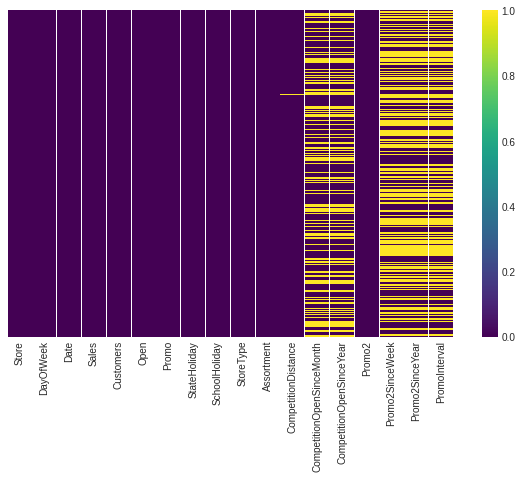

In [ ]:
# Checking null values in our dataset
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

**Conclusion:**

There are some columns having a large number of missing values. Let's get more info on those columns

### **Checking NaN/Missing values:**

In [ ]:
# Getting more info on the null values:\
feat_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(feat_nan)

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Checking the percentage of null values in these columns
for feature in feat_nan:
    print("Column {} has {} null records which is {} percent of total records".format(feature, df[feature].isnull().sum(),
                                                                                     (df[feature].isnull().sum()*100)/len(df)))
          

Column CompetitionDistance has 2642 null records which is 0.25973030124586 percent of total records
Column CompetitionOpenSinceMonth has 323348 null records which is 31.787764363075826 percent of total records
Column CompetitionOpenSinceYear has 323348 null records which is 31.787764363075826 percent of total records
Column Promo2SinceWeek has 508031 null records which is 49.94362023930186 percent of total records
Column Promo2SinceYear has 508031 null records which is 49.94362023930186 percent of total records
Column PromoInterval has 508031 null records which is 49.94362023930186 percent of total records


The columns 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval' has 50 percent of values as null. So it will be better to drop these columns.

**Checking the NaN values with respect to the dependent variable:**

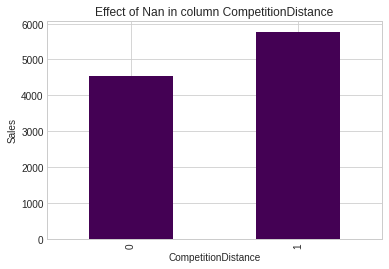

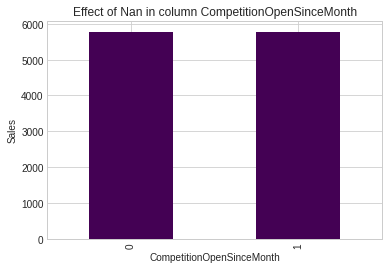

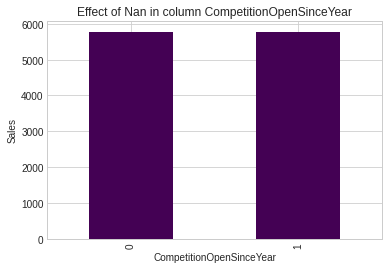

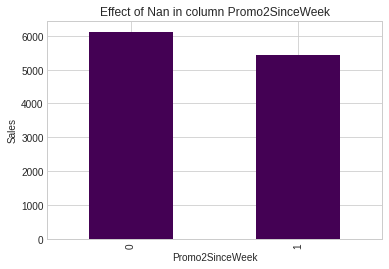

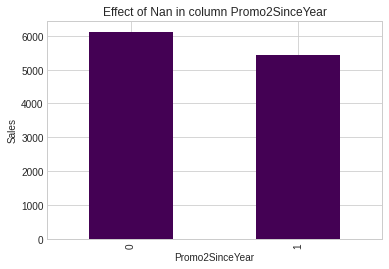

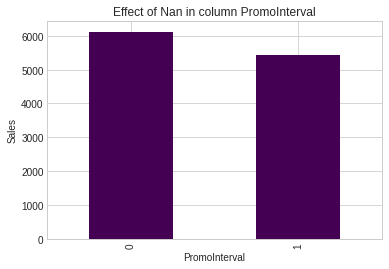

In [ ]:
for feature in feat_nan:
    data= df.copy()
    data[feature] = np.where(df[feature].isnull(), 0, 1)
    plt.figure(figsize = (6,4))
    data.groupby(feature)['Sales'].mean().plot(kind = 'bar', cmap = 'viridis')
    plt.title('Effect of Nan in column {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel("Sales")

The **conclusion** that can be drawn from the above plots is this that as we have seen from the percentage of null values that the last two columns have almost 50 percent of their total values as null which is reflected in the bar plot above. So, we will be safely removing the last three columns having more than 50 percent of null values

In [ ]:
# Dropping the last two columns from our dataset
df.drop(['Promo2SinceYear','PromoInterval','Promo2SinceWeek'], axis = 1, inplace = True)

### **Separating our features into numerical, categorical and temporal:**

In [ ]:
# Storing the date columns in a separate list:
temporal_feat = ['Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [ ]:
# Let's separate the numerical from the categorical columns first
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in temporal_feat]
categorical_feat = [feature for feature in df.columns if feature not in num_features + temporal_feat]

In [ ]:
# Checking our numerical features
print(num_features)

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2']


In [ ]:
# Checking our categorical features
print(categorical_feat)

['StateHoliday', 'StoreType', 'Assortment']


StateHoliday has values 0 in it, so should'nt it be in the numerical features! 
Let's have a closer look into it

**Fixing Abnormality in the StateHoliday column:**

In [ ]:
# Abnormality in the StateHoliday column
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
# Converting the integer 0 in the column StateHoliday to object
df.loc[df['StateHoliday'] == 0, 'StateHoliday'] = '0'

In [ ]:
# Now checking on the column again
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

**Further separating our numerical features into discrete and continuous:**

In [ ]:
# Separating into discrete and continuous numeric features
disc_num = [feature for feature in num_features if df[feature].nunique() < 1120]
cont_num = [feature for feature in num_features if feature not in disc_num]

Storing the column Store to the discrete column as we know that there are a total of 1115 stores in our dataset and they must be stored as a discrete column, and since their competition distances are also the same the column 'Competition Distance' should also be discrete

In [ ]:
print(disc_num)

['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2']


In [ ]:
print(cont_num)

['Sales', 'Customers']


# **Exploratory Data Analysis:**

### **Data Analysis for continuous numerical feature and Dependent Variable 'Sales':**

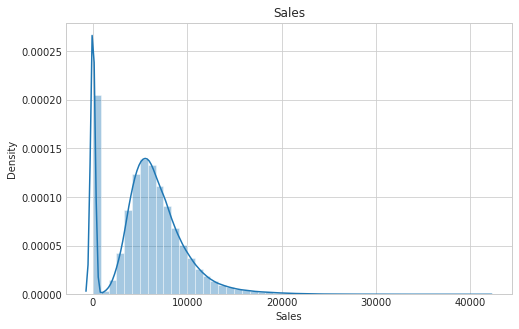

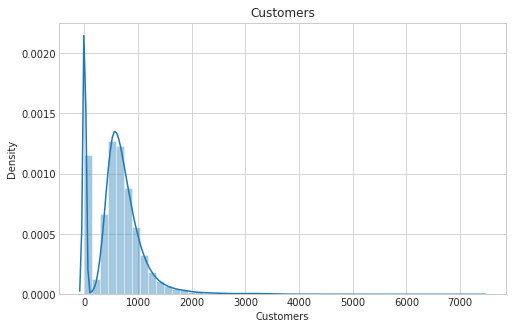

In [ ]:
# Let's check the distribution of our continuous features first
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.distplot(df[feature], hist = True)
    plt.title(feature)
    plt.show()

**Conclusion:**
Both our continuous feature Customers' and dependent feature 'Sales' are not normally distributed. Additionally, there is huge spike at values 0 for both customers and Sales. Let's check on these values

**Checking distribution of our dependent variable 'Sales' and continuous feature 'Customers':**

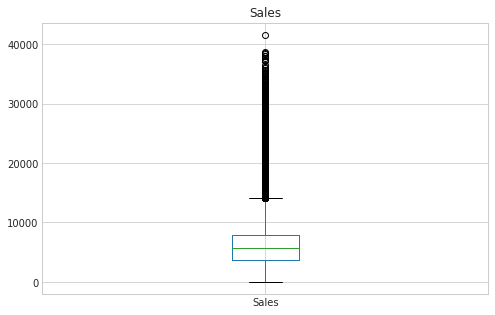

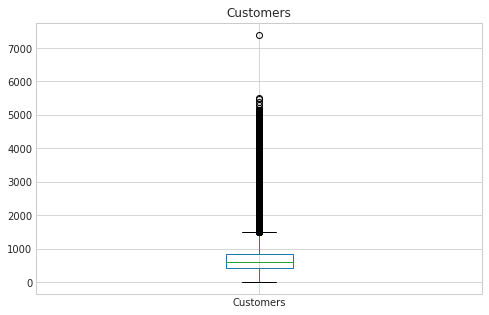

In [ ]:
# Let's check the distribution of our continuous features first
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    df.boxplot(column = feature)
    plt.title(feature)
    plt.show()

**Conclusion:**

Both our dependent variable 'Sales' and continuous feature 'Customers' seem to have outliers. We will manage them in the Feature engineering section

### **Data Analysis for Discrete numerical features:**

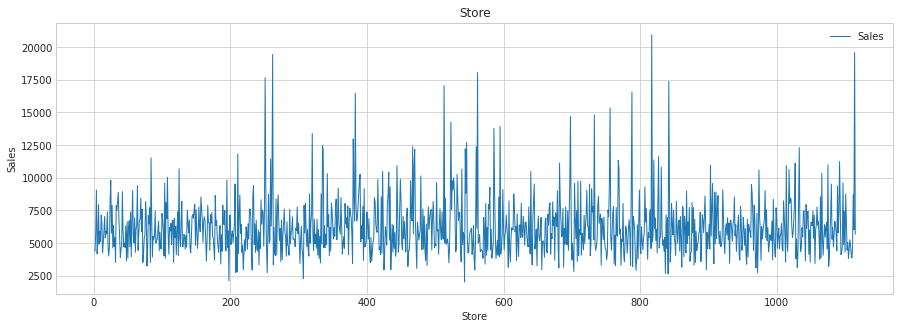

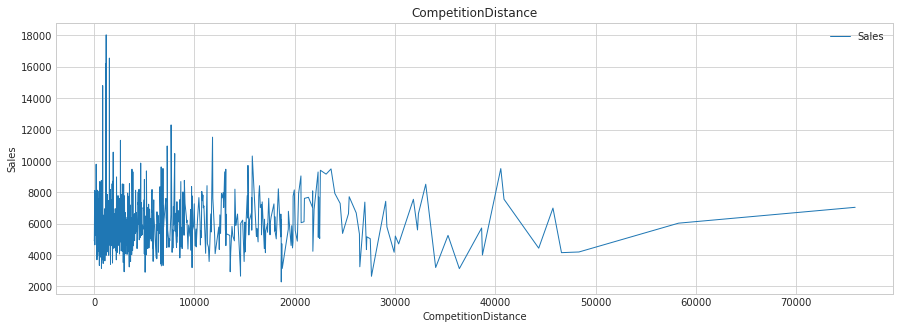

In [ ]:
# Lets check distribution of the discrete features
for feature in disc_num:
    if feature in ['Store','CompetitionDistance']:
        sns.set_style("whitegrid")
        df.pivot_table('Sales', index= feature, aggfunc='median').plot(lw = 1, figsize = (15,5))
        plt.title(feature)
        plt.ylabel("Sales")

**Conclusion:**
The conclusion from the two above plots is this that the first plot of Store vs Sales gives a direct comparison of Sales data between all the stores,

And secondly, we have an interesting conclusion where we can see that Stores where the distance of their competitor is within 100-1000 metres, the Sales is much higher. But Sales number drops as the distance of Competitor from the store increases. 

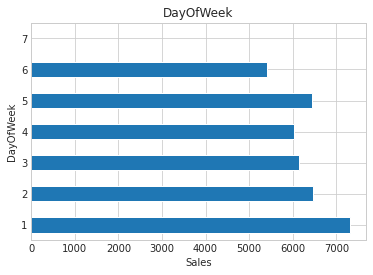

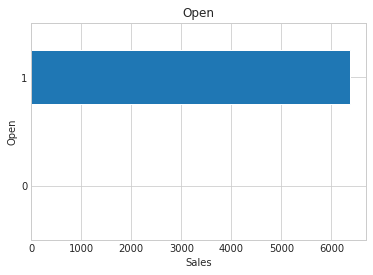

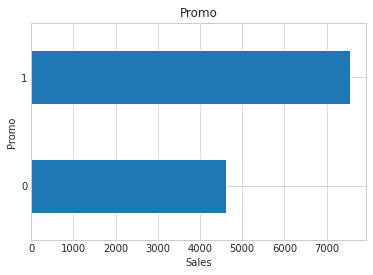

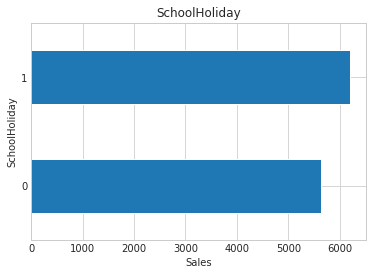

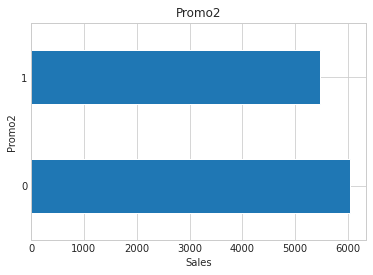

In [ ]:
# Checking the rest of the discrete features
# Lets check distribution of the discrete features
for feature in disc_num:
    if feature not in ['Store','CompetitionDistance']:
        plt.figure()
        df.groupby(feature)['Sales'].median().plot(kind = 'barh',figsize = (6,4))
        plt.title(feature)
        plt.xlabel('Sales')
        plt.ylabel(feature)
        plt.show()

**Conclusion:**
1. Firstly, Sales are highest on the first day of the week, followed by the fifth day. However, there are no sales on the last day, maybe because stores are closed that day.
2. Secondly, Sales are highest when stores are open and is quite straight-forward. However, the next plot says stores which have done a promo, have encountered a higher sales rate than those who haven't.
3. Sales are a bit higher on SchoolHolidays, are most of the customers school students?
4. The impact of Promo2 is quite opposite than what I expected. Stores who didn't participate in a second promo had higehr Sales than those who did participate.

### **Data Analysis for Categorical features:**

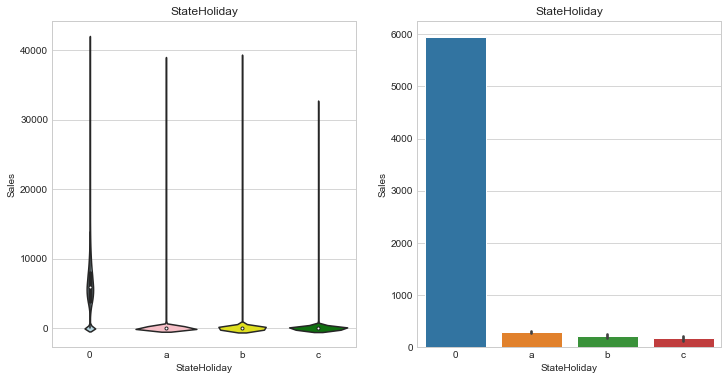

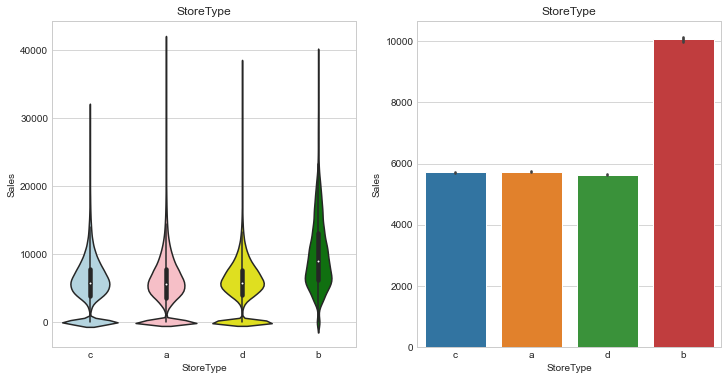

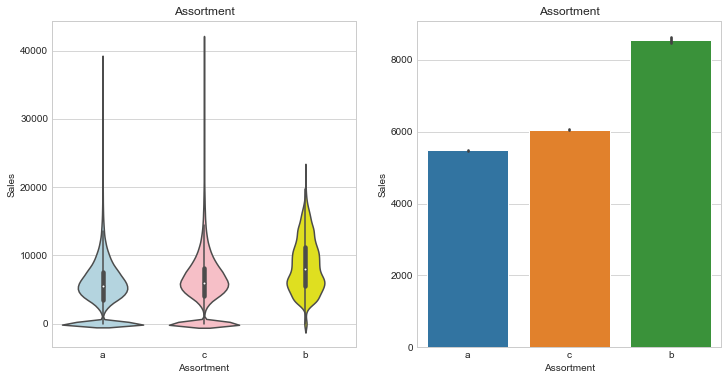

In [ ]:
for feature in categorical_feat:
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1)
    sns.violinplot(feature, 'Sales', data = df, palette = ['lightblue','lightpink','yellow','green'])
    plt.title(feature)
    plt.ylabel("Sales")
    plt.subplot(1, 2, 2)
    sns.barplot(feature, 'Sales', data = df)
    plt.title(feature)
    plt.ylabel("Sales")

**Conclusion:**
1. Firstly, Sales are highest when there are no State holidays.
2. Secondly, Sales are highest in store type 'B' when compared to the other store types.
3. Sales are higher where assortment levels are extra. Assortment is a strategy to increase the number of sales and generally applied for a few days.

We have also added to violin plot to get an idea of the distribution of our categorical features with respect to our dependent feature which is 'Sales'.

# **Feature Engineering:**
These are the steps that we will follow:


*  We will be making some changes to our temporal columns by trying to fit a mathematical relationship between them.
* Will be adjusting our discrete features, will be converting some into dummy variables and other into label encoding.

* We will be modifying our dependent variable by inversing the values as it hs outliers.
*  Outlier-Treatment: We will update the outlier values in the 'Customers' column by their median values.

* We will be plotting a heatmap to check the final correlation of the features in our dataset.


In [ ]:
# Creating a copy of our dataset
data = df.copy()

In [ ]:
# Updating nan features
feat_nan = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

# Updating the NaN values with their median
for feature in feat_nan:
    data.loc[data[feature].isnull(), feature] = np.nanmedian(df[feature])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

<AxesSubplot:>

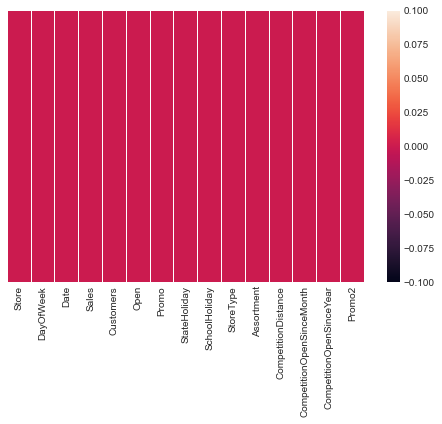

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(data.isnull(), yticklabels = False)

**Conclusion:**
No more missing values in our dataset

**Dealing with temporal columns:**

In [ ]:
# Combining columns of CompetitionOpenSince Year and Month
data['Comp_open_month_year'] = data['CompetitionOpenSinceYear'] + (data['CompetitionOpenSinceMonth']/12)

# Removing the columns CompetitionOpenSince Year and Month
data.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis = 1, inplace = True)

# Modifying our Date column
data['Sale_date'] = data['Date'].apply(lambda x: x[-2:]).astype(int)

In [ ]:
# Writing a function to extract the year and month from Date
def convert_date(str_f):
    nopunc = str_f.replace('-',' ').split()
    nopunc_1 = int(nopunc[0])
    nopunc_2 = int(nopunc[1])
    return (nopunc_1 + (nopunc_2/12))

In [ ]:
data['Date'] = data['Date'].apply(convert_date)
data['Date'] = np.round(data['Date'],3)

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Comp_open_month_year,Sale_date
0,1,5,2015.583,5263,555,1,1,0,1,c,a,1270.0,0,2008.75,31
1,1,4,2015.583,5020,546,1,1,0,1,c,a,1270.0,0,2008.75,30
2,1,3,2015.583,4782,523,1,1,0,1,c,a,1270.0,0,2008.75,29
3,1,2,2015.583,5011,560,1,1,0,1,c,a,1270.0,0,2008.75,28
4,1,1,2015.583,6102,612,1,1,0,1,c,a,1270.0,0,2008.75,27


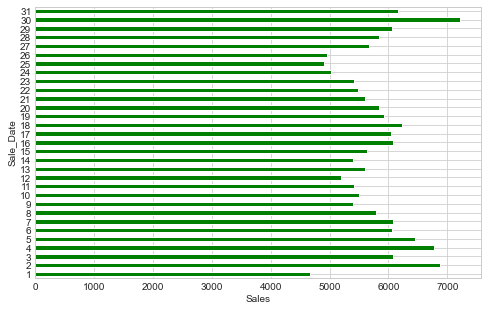

In [ ]:
# Lets check sales relative to the Date
# Lets update our temporal variable list
plt.figure(figsize = (8,5))
data.groupby('Sale_date')['Sales'].median().plot(kind = 'barh', color = 'green')
plt.xlabel("Sales")
plt.ylabel("Sale_Date")
plt.show()

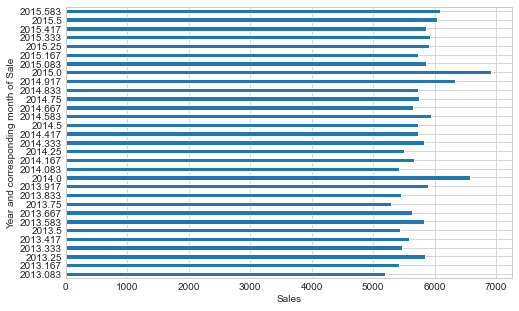

In [ ]:
# Lets update our temporal variable list
plt.figure(figsize = (8,5))
data.groupby('Date')['Sales'].median().plot(kind = 'barh')
plt.xlabel("Sales")
plt.ylabel("Year and corresponding month of Sale")
plt.show()

**Conclusion:**
We have drawn a graph to compare between the Sales data and the date, to know the corressponding year and date and how the Sales value depend on these two features. However, the overall Sales value is overall the same on every date with the highest being in the last two days of each month that is 30th and 31st.

Similarly, the maximum Sales number was in the month of January in 2015, however on all the other Dates, Sales count is almost the same.

In [ ]:
# further subsetting our discrete features
disc_num_type_1 = [feature for feature in data.columns if data[feature].dtypes != 'O' and (data[feature].nunique() < 1120)
                   & (data[feature].nunique() > 5)]
disc_num_type_2 = [feature for feature in data.columns if data[feature].dtypes != 'O' and feature not in disc_num_type_1 + cont_num]

Dividied the discrete variables into two lists such that disc_type one can be converted label encoded by comparing each value with the median of our dependent variable 'Sales' and disc_type two is converted into dummy variables and the dataset is updated.

**Converting discrete_num_type_2 and categorical features into dummy variables:**

In [ ]:
# Converting our discrete_num_2 and categorical features into dummy variables using one hot encoding
dummy_feat = disc_num_type_2 + categorical_feat
data =pd.get_dummies(data, columns = dummy_feat, prefix = ['open','promo', 'schoolhol','promo2',
                                                          'statehol','storetype','assort'], drop_first = True)

**Mean encoding discrete_num_type_1 by the values they correspond to in the 'Sales' column and then mapping them to the actual dataset:**

In [ ]:
# Dealing with disc_num_type_1
for feature in disc_num_type_1:
    temp = data.groupby(feature)['Sales'].median().sort_values().index
    temp_df = {k:i for i,k in enumerate(temp)}
    data[feature] = data[feature].map(temp_df)

In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,CompetitionDistance,Comp_open_month_year,Sale_date,open_1,promo_1,schoolhol_1,promo2_1,statehol_a,statehol_b,statehol_c,storetype_b,storetype_c,storetype_d,assort_b,assort_c
0,184,4,27,5263,555,583,38,25,1,1,1,0,0,0,0,0,1,0,0,0
1,184,2,27,5020,546,583,38,30,1,1,1,0,0,0,0,0,1,0,0,0
2,184,3,27,4782,523,583,38,20,1,1,1,0,0,0,0,0,1,0,0,0
3,184,5,27,5011,560,583,38,17,1,1,1,0,0,0,0,0,1,0,0,0
4,184,6,27,6102,612,583,38,14,1,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Store                 1017209 non-null  int64
 1   DayOfWeek             1017209 non-null  int64
 2   Date                  1017209 non-null  int64
 3   Sales                 1017209 non-null  int64
 4   Customers             1017209 non-null  int64
 5   CompetitionDistance   1017209 non-null  int64
 6   Comp_open_month_year  1017209 non-null  int64
 7   Sale_date             1017209 non-null  int64
 8   open_1                1017209 non-null  uint8
 9   promo_1               1017209 non-null  uint8
 10  schoolhol_1           1017209 non-null  uint8
 11  promo2_1              1017209 non-null  uint8
 12  statehol_a            1017209 non-null  uint8
 13  statehol_b            1017209 non-null  uint8
 14  statehol_c            1017209 non-null  uint8
 15  storetype_b    

### **Outlier Treatment:**


**Updating the columns 'Sales' and 'Customers' :**

In [ ]:
# Creating a copy of our dataset
data_out = data.copy()
data_out['Sales'] = np.sqrt(data_out['Sales'])

# for column customers
q1 = np.percentile(data_out['Customers'], 25)
q3 = np.percentile(data_out['Customers'], 75)
iqr = q3 - q1
u_lim, l_lim = q3 + 1.5*iqr, q1 - 1.5*iqr
temp = data_out['Customers'][(data_out['Customers'] < u_lim) & (data_out['Customers'] > l_lim)].values
data_out['Customers'] = np.where(data_out['Customers'].isin(temp), data_out['Customers'], data_out['Customers'].median())

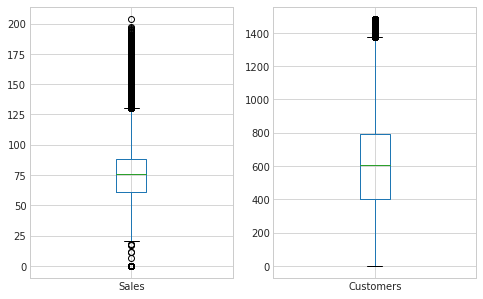

In [ ]:
# Checking whether the columns have outliers or not
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
data_out.boxplot(column = ['Sales'])
plt.subplot(1,2,2)
data_out.boxplot(column = ['Customers'])

**Conclusion:**
Now, our dependent variable and continuous feature looks like the perfect boxplot, we have finally got rid of Outliers !!

### **Checking distribution after Outlier Treatment:**

Text(0.5, 1.0, "Distribution of dependent variable 'Sales'")

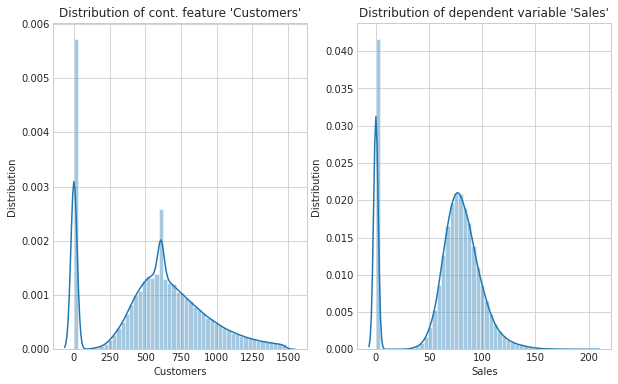

In [ ]:
# Checking histogram after treatment of outliers:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.distplot(data_out['Customers'], hist = True)
plt.ylabel("Distribution")
plt.title("Distribution of cont. feature 'Customers'")
plt.subplot(1,2,2)
sns.distplot(data_out['Sales'], hist = True)
plt.ylabel("Distribution")
plt.title("Distribution of dependent variable 'Sales'")

**Conclusion:**
We have plotted a histogram of our Dependent variable Sales and our continuous feature 'Customers' to check their respective distribution after dealing with outliers.

### **Plotting our final correlation heatmap:**

<AxesSubplot:>

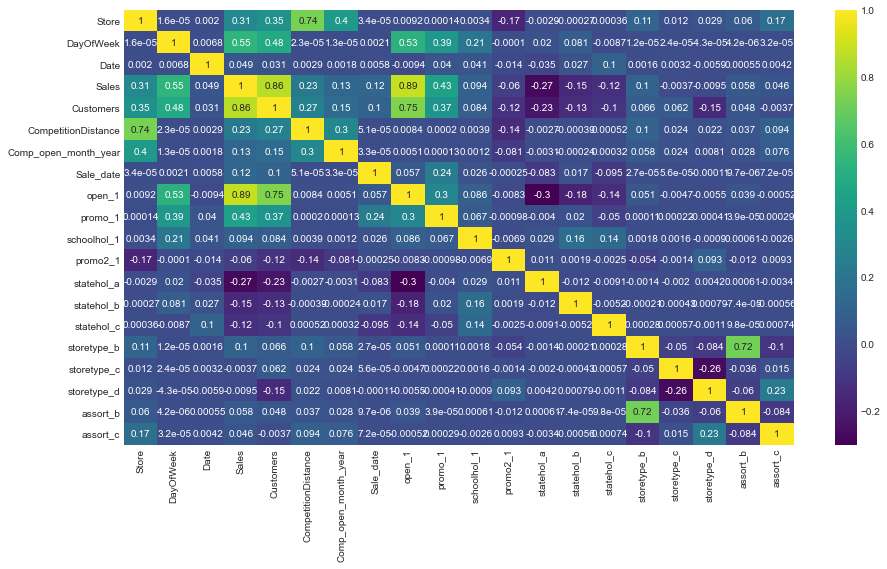

In [ ]:
# Plotting a heatmap
plt.figure(figsize = (15,8))
sns.heatmap(data_out.corr(), annot = True, cmap ='viridis')

**Conclusion:**
There are several features which are highly correlated. Let's dig deep into this using Variance Inflation Factor(VIF)

In [ ]:
# Splitting our dataset into X and y:
X = data_out.drop('Sales', axis = 1)
y = data_out['Sales']

### **Calculating Variance Inflation factor(VIF):**

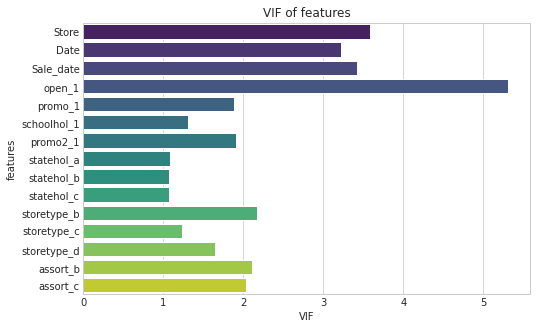

In [ ]:
# Writinga  function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

calculate_vif = calc_vif(data_out[[i for i in X.columns if i not in ['Comp_open_month_year','Customers',
                                                    'CompetitionDistance','DayOfWeek']]])
plt.figure(figsize = (8,5))
sns.barplot(y = 'features', x = 'VIF', data = calculate_vif, palette = 'viridis')
plt.title("VIF of features")
plt.show()

**Conclusion:**
All the features have their VIFs below 5 which says that they are not mutually correlated with each other.
However, feature **open_1** has its VIF a little more than 5, but I have decided to keep it, because it has a very good correlation(the highest) with the dependent feature 'Sales'. I haven't yet removed the features having low dependency with 'Sales' as I will later be applying Lasso regularization and these features will automatically shrink to 0.

**Dropping highly correlated features:**

In [ ]:
# Updating value of X
# Dropping features having high multicollinearity with other features
X = X.drop(['Comp_open_month_year','Customers','CompetitionDistance','DayOfWeek','promo2_1'], axis = 1)
y = data_out[['Sales']]                                                

In [ ]:
# Getting a basic info of our X values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   Store        1017209 non-null  int64
 1   Date         1017209 non-null  int64
 2   Sale_date    1017209 non-null  int64
 3   open_1       1017209 non-null  uint8
 4   promo_1      1017209 non-null  uint8
 5   schoolhol_1  1017209 non-null  uint8
 6   statehol_a   1017209 non-null  uint8
 7   statehol_b   1017209 non-null  uint8
 8   statehol_c   1017209 non-null  uint8
 9   storetype_b  1017209 non-null  uint8
 10  storetype_c  1017209 non-null  uint8
 11  storetype_d  1017209 non-null  uint8
 12  assort_b     1017209 non-null  uint8
 13  assort_c     1017209 non-null  uint8
dtypes: int64(3), uint8(11)
memory usage: 41.7 MB


# **Feature Scaling:**
* Scaling our features using MinMaxScaler to normalize our data.




In [ ]:
# Scaling the dataset using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
# Using train_test_split to split our data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head()

,Store,Date,Sale_date,open_1,promo_1,schoolhol_1,statehol_a,statehol_b,statehol_c,storetype_b,storetype_c,storetype_d,assort_b,assort_c
635787,0.990126,0.066667,0.533333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621011,0.971275,0.566667,0.966667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69929,0.727110,0.366667,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
53248,0.309695,0.400000,0.900000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
658989,0.579892,0.600000,0.300000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Lets check the number of records in our train and test dataset
print("Records in train set: {}".format(X_train.shape[0]))
print("Records in test set: {}".format(X_test.shape[0]))

Records in train set: 813767
Records in test set: 203442


# **Fitting our model using Linear Regression:**

*  We will be starting with the most simplistic of models which is the LinearRegression Model.
*   Will be predicting on both test and train data to check if our model is overlapping or not.


### **Using Lasso Regularization:**

*  Lasso will prevent the model from overfitting.It will shrink the coefficients of the least important features to zero.
*  Lasso will also penalise the features having high coefficients.
*  We will be using Cross validation and Hyperparameter tuning to get the best value of alpha.


### **Using RandomizedSearch crossvalidating technique:**

In [ ]:
from sklearn.linear_model import Lasso
# Fitting our model in Lasso Regularization to select only the important features
model = Lasso()

# Selecting our list of alpha values
params = {'alpha' : [0.10, 1, 3, 5]}

# Using Randomized CV to choose the best value of alpha:
rndm_s = RandomizedSearchCV(model, param_distributions = params, random_state = 0, scoring = 'r2', cv = 5)
rndm_s.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [0.1, 1, 3, 5]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='r2', verbose=0)

In [ ]:
# Checking the best parameter of alpha
rndm_s.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Passing our best parameter to the Lasso Regularization
regularize = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
regularize.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Let's check the features which have been reduced by zero
regularize.coef_

array([ 3.48345000e+01,  4.49114944e+00,  2.57086606e+00,  7.57063726e+01,
        1.24462762e+01,  6.88548142e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.43955159e+00, -0.00000000e+00, -4.62646246e-01,
        0.00000000e+00, -0.00000000e+00])

**Checking the features selected by Lasso by a bar plot:**

Text(0.5, 1.0, 'Feature Importance')

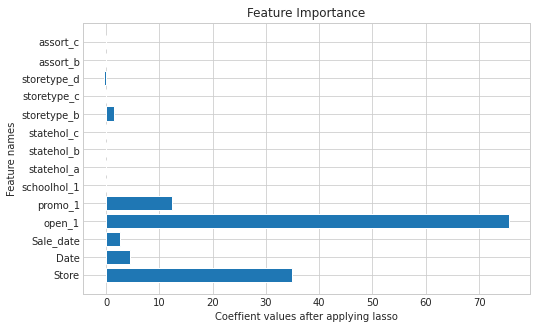

In [ ]:
# Let's check the feature importance and the features which have been reduced to zero by Lasso
plt.figure(figsize = (8,5))
coef_data = pd.DataFrame()
coef_data['column_name'] = X_train.columns
coef_data['Coefficients'] = regularize.coef_
plt.barh(coef_data['column_name'], coef_data['Coefficients'], )
plt.xlabel("Coeffient values after applying lasso")
plt.ylabel("Feature names")
plt.title("Feature Importance")

**Conclusion:**
The most important feature according to our bar plot is 'Open' which says whether the store is open or not. Theoritically, if the store is closed Sales will be zero, followed by Store and then Promo1.
Most of the features have shrinked to zero because of their low correspondence with the dependent variable 'Sales'.

# **Checking accuracy of our model:**

In [ ]:
# Getting the predicted value of y for train and test
y_test_p = regularize.predict(X_test)
y_train_p = regularize.predict(X_train)

In [ ]:
# Printing metrics after using regularization
r2_tr = r2_score(y_train, y_train_p)
r2_tt = r2_score(y_test, y_test_p)
mse_tr_reg = mean_squared_error(y_train_p**2, y_train**2)
mse_tt_reg = mean_squared_error(y_test_p**2, y_test**2)
r2_adjusted = 1 - (1-regularize.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_tt = mean_absolute_error(y_test_p**2, y_test**2)
mae_tr = mean_absolute_error(y_train_p**2, y_train**2)


# Printing our accuracy
print("MAE(train set): {}".format(mae_tr))
print("MAE(test set): {}".format(mae_tt))
print("RMSE(train set): {}".format(np.sqrt(mse_tr_reg)))
print("RMSE(test set): {}".format(np.sqrt(mse_tt_reg)))
print("r2 score(train): {}".format(r2_tr))
print("r2 score(test): {}".format(r2_tt))
print("r2_adjusted score: {}".format(r2_adjusted))


MAE(train set): 1036.419569135293
MAE(test set): 1032.5077789341567
RMSE(train set): 1763.8357641161526
RMSE(test set): 1757.8775984368424
r2 score(train): 0.9131466382361707
r2 score(test): 0.9133911748681841
r2_adjusted score: 0.9133852143833328


### **Summary of our Linear Regression Model:**

In [ ]:
# Summarizing our model 
X_summary = sm.add_constant(X_test[['Store','Date','Sale_date','open_1','promo_1','storetype_b']])
model = sm.OLS(y_test, X_summary)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 3.609e+05
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:49:53   Log-Likelihood:            -7.5906e+05
No. Observations:              203442   AIC:                         1.518e+06
Df Residuals:                  203435   BIC:                         1.518e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -22.9612      0.084   -272.793      

# **Conclusion from summary:**



*  Firstly, we will be assuming a null hypothesis claiming that the features are independent of our dependent column 'Sales'.


*  The coefficient columns in the summary tells us the value of the slopes of each independent feature.

*  The standard error is also low, which says that our model has predicted the coefficients with minimal error.


*  Coefficients divided by the standard error gives us the t statistic value. The values are quite high in our model, which tells us that the features are statistically significant.

*  Lastly, the p values are less than 0.05 for all the independent features, which says we can reject our null hypothesis and that our features are correlated with the dependent feature 'Sales'.







Text(0.5, 1.0, 'Error distribution of Sales predicted and Actual Sales')

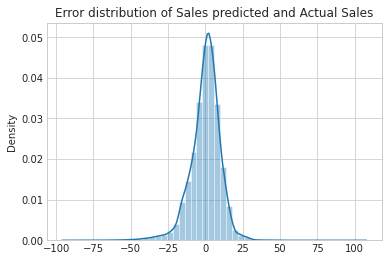

In [ ]:
# Lets check the error distribution of our dataset
plt.figure(figsize = (6,4))
sns.distplot(y_test_p.reshape(203442, 1) - y_test, hist = True)
plt.title("Error distribution of Sales predicted and Actual Sales")